# 4.1 Contorns

Ara que ja sabem detectar objectes, és hora de delimitar-los amb un **contorn** per poder analitzar-los en profunditat i determinar quin objecte hem detectat.

La detecció de contorns és de gran importància en el processament d’imatges, no sols per reconèixer objectes, sinó també per delimitar regions. 

Però, què és un contorn? Seguint la definició que trobem en el [tutorial de l'openCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html), un contorn és una línia corba que uneix tots els punts consecutius que rodegen un objecte determinat, o en altres paraules, un contorn és la línia que marca la frontera entre l'objecte i el fons de la imatge.

## Detecció de Contorns
La detecció de contorns ens permet aïllar els objectes del fons.

OpenCV ens permet trobar i dibuixar contorns de manera bastant automàtica, però hem de tenir en compte que existeixen diversos algoritmes i funcions per detectar contorns i característiques dels objectes. Depenent de la imatge i dels objectes que vulguem detectar, ens anirà millor un algoritme o altre. 

Normalment, els contorns dels objectes es corresponen amb canvis d'intensitat grans quant a color o intensitat i, una manera de mesurar aquest canvi és a través del gradient d'una imatge. 

Els gradients s’utilitzen per analitzar funcions i veure com varien i es comporten al llarg del seu domini. 

El gradient en un punt d’una funció real de diverses variables reals, és el conjunt ordenat de les derivades parcials d’aquesta funció en aquest punt. Aquest conjunt ordenat és el vector gradient, el qual té una magnitud (mòdul) i una direcció associada. La direcció del vector gradient indica l’angle o direcció en el qual la funció  varia més ràpidament, mentre que el mòdul representa el ritme de variació o la intensitat del canvi (a valor més elevat, ritme més accelerat o canvi més pronunciat).

La magnitud del gradient ens indica com de ràpid canvia la imatge, mentre que la direcció del gradient ens indica la direcció amb la qual la imatge està canviant més ràpidament.

A nivell matemàtic, el gradient es defineix per les derivades parcials d'una funció donada al llarg de les direccions X i Y: els punts on la derivada és màxima corresponen a canvis d'intensitat grans. Per tant, els gradients ens poden ajudar a detectar contorns. 

En OpenCV existeixen diferents mètodes per calcular l'aproximació al gradient, segons el tipus de matriu de convolució (*kernel*) que s'apliqui a cada píxel de la imatge per calcular les aproximacions al gradient de la imatge. Aquestes kernels poden ser de Sobel, Scharr o Laplacià. 

L'operador de **Sobel** utilitza dos kernels quadrats 3x3, un per detectar contorns en direcció horitzontal i l'altre per detectar contorns en direcció vertical. Si definim $\begin{equation}I\end{equation}$ com la imatge original, calcularíem les aproximacions horitzontal $\begin{equation}G_x\end{equation}$ i vertical $\begin{equation}G_y\end{equation}$ de les derivades d'intensitats aplicant els següents càlculs:

<center>
    $\begin{equation}G_x=\begin{bmatrix}-1 & 0 & +1\\-2 & 0 & +2 \\ -1 & 0 & +1\end{bmatrix} * I\end{equation}$<br><br>
    $\begin{equation}G_y=\begin{bmatrix}-1 & -2 & -1\\0 & 0 & 0 \\ +1 & +2 & +1\end{bmatrix} * I\end{equation}$<br>
</center>
    

Un cop tinguéssim aquestes aproximacions, podríem calcular la magnitud i la direcció del gradient aplicant les fòrmules:

<center>
    $\begin{equation}Magnitud: G = \sqrt{G_x^2 + G_y^2} \end{equation}$<br><br>
    $\begin{equation}Direcció: \theta = \operatorname {arctan}(\frac{G_x}{G_y}) \end{equation}$<br>
</center>


Per altra banda, la matriu de **Scharr**, utilitza també un kernel 3x3 però donant molt més pes a la fila central, el que permet eliminar el possible soroll del voltant (de les files superior i inferior) i mantenir encara més 'especificitat de la fila central (comparant amb els resultats utilitzant Sobel):

<center>
    $\begin{equation}G_x=\begin{bmatrix}-3 & 0 & +3\\-10 & 0 & +10 \\ -3 & 0 & +3\end{bmatrix} * I\end{equation}$<br><br>
    $\begin{equation}G_y=\begin{bmatrix}-3 & -10 & -3\\0 & 0 & 0 \\ +3 & +10 & +3\end{bmatrix} * I\end{equation}$<br>
</center>

Finalment, el kernel **Laplacià** aplica el següent kernel per filtrar:

<center>$\begin{equation}kernel=\begin{bmatrix}0 & 1 & 0\\1 & -4 & 1 \\ 0 & 1 & 0\end{bmatrix}\end{equation}$<br></center>


Veiem algun exemple de detecció de contorns fent servir diferents matrius de convolució o kernels.

Text(0.5,1,'Original')

Text(0.5,1,'X + Y')

Text(0.5,1,'Vertical')

Text(0.5,1,'Horitzontal')

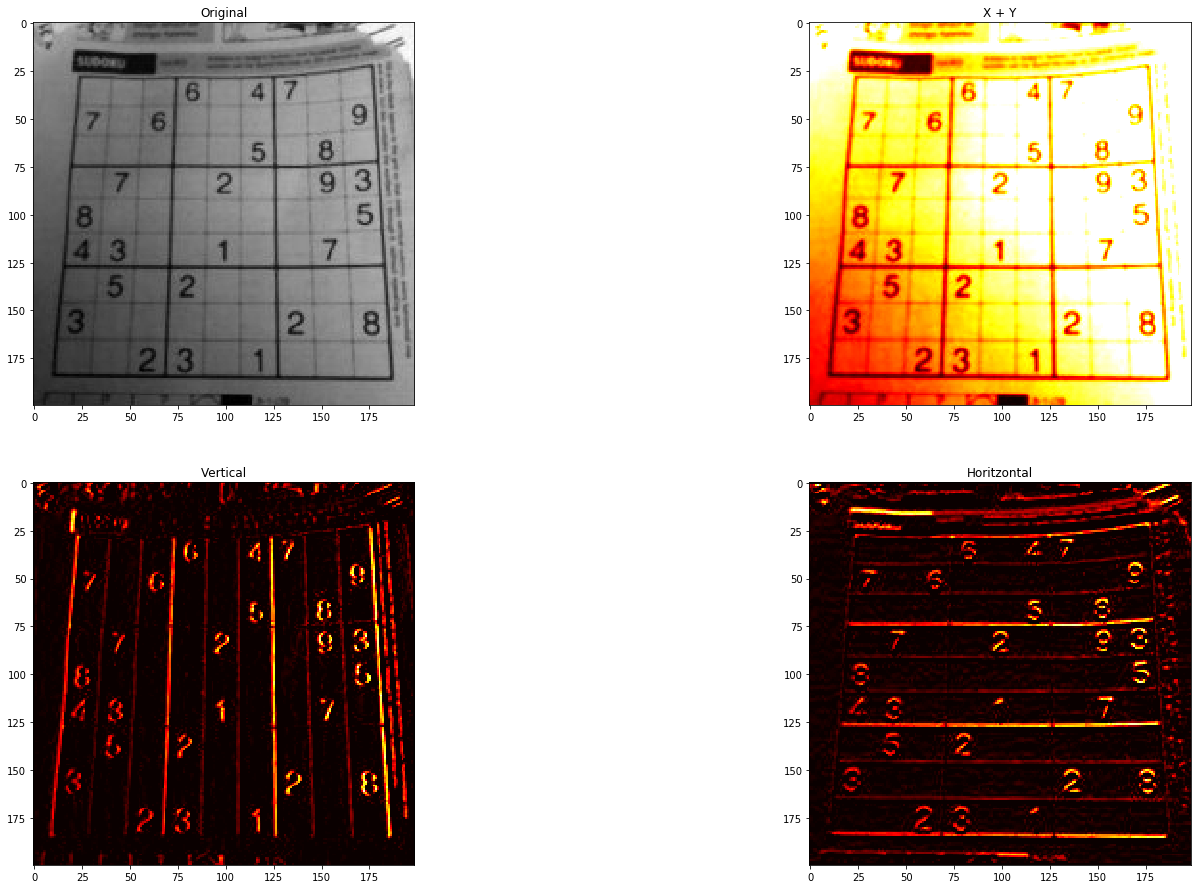

In [18]:
# EXERCICI: Detecció de contorns amb diferents matrius de convolució

import cv2
import numpy as np
from matplotlib import pyplot as plt

im = cv2.imread('Imatges/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

# creem un kernel per detectar contorns en direcció horitzontal i vertical
kernel = np.array([ [1/9, 1/9, 1/9],
                    [1/9, 1, 1/9],
                    [1/9, 1/9, 1/9]])

dst = cv2.filter2D(im,-1,kernel)

plt.subplot(2,2,1)
plt.imshow(im, cmap='gray')
plt.title('Original')
plt.subplot(2,2,2)
plt.title('X + Y')
plt.imshow(dst, cmap='hot')

# creem un kernel per detectar contorns en direcció vertical
kernel = np.array([ [1, 0, -1]])
dst = cv2.filter2D(im,-1,kernel)
plt.subplot(2,2,3)
plt.title('Vertical')
plt.imshow(dst, cmap='hot')

# creem un kernel per detectar contorns en direcció horitzontal
kernel = np.array([ [1, 0, -1]])
dst = cv2.filter2D(im,-1,kernel.transpose())
plt.subplot(2,2,4)
plt.title('Horitzontal')
plt.imshow(dst, cmap='hot')


fig = plt.gcf()
fig.set_size_inches(25.5, 15.5)



## Mètode de Canny

El **mètode Canny** és un dels algoritmes més populars per a la detecció de contorns. Està basat en derivades per trobar aquells píxels on el canvi de gradient i intensitat és màxima. És per aquesta raó que l’algoritme és molt influenciable al soroll i necessita aplicar prèviament algun mètode de reducció del mateix com un filtre Gaussià que suavitzi la imatge.

L'algoritme de Canny consta dels següents passos:
1. Reducció del soroll aplicant algun filtre Gaussià.
2. Trobar el gradient d'intensitat de la imatge aplicant un filtre de Sobel. 
3. Eliminar falsos màxims: es refinen (milloren) i s'afinen (es fan més prims) els contorns trobats en el pas anterior eliminant els píxels que no formen part del contorn. Això s'aconsegueix comparant el valor del píxel amb els seus veïns en la direcció del gradient (perpendicular al contorn); si el valor del píxel actual és més gran que el dels veïns, es considera un màxim local i l'algoritme l'accepta; en cas contrari el píxel és suprimit.
4. Llindar de histèresi: Refinament o filtratge final dels píxels del contorn per eliminar aquells falsos positius provinents de soroll i de canvis de color. Aquest pas necessita llindars, uns valors màxim i mínim pels gradients d'intensitat que determinaran si un píxel és acceptat (és considerat _fort_) o descartat (és considerat _feble_) com part del contorn final. Tots els gradients d'intensitat majors que el valor màxim seran considerats _forts_, tots els inferiors al valor mínim seran descartats, i la resta dependrà dels veïns immediats: si estan connectats a un punt fort seran considerats forts, sinó seran febles i descartats.

Tots aquests passos estan continguts en una única funció en OpenCV, la funció cv2.canny, però hem de tenir en compte que aquesta funció té diversos paràmetres importants, els valors dels quals influiran molt en la qualitat del resultat final (els llindars i la mida del kernel Sobel).

De vegades, és molt difícil obtenir el valor adequat d'un paràmetre d'un algoritme. Per això, les OpenCV disposen de barres de selecció interactives que es poden afegir a finestres amb imatges. D'aquesta manera, podem crear interfícies interactives per a escollir els millors paràmetres possibles. 

Anem a veure un exemple d'una interfície interactiva aplicant l'algoritme de Canny per detectar contorns, l'exemple ens permetrà jugar amb diferents valors dels llindars i de la mida del kernel Sobel.


In [19]:
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

im = cv2.imread('Imatges/coins.jpg', cv2.IMREAD_GRAYSCALE)

# per detectar les monedes, podem fer servir un detector de contorns com Canny:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html


@interact
def canny_parameters(lower=range(0, 255, 10), upper=range(0, 255, 10), sobel=[3,5,7]):
    edges = cv2.Canny(im, lower, upper, apertureSize=sobel)
    plt.subplot(1,2,1)
    plt.imshow(im, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(edges, cmap='gray')
    fig = plt.gcf()
    fig.set_size_inches(25.5, 15.5)
    return lower


interactive(children=(Dropdown(description='lower', options=(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, …

## Característiques dels Contorns
Igual que hem vist amb els Blobs, moltes vegades no en tenim prou amb detectar els contorns, també necessitem saber de quin objecte es tracta, o pot ser alguna característica principal per detectar aquells objectes o regions de la imatge que realment són del nostre interès. Aquí és on podem aplicar les característiques i propietats dels contorns. N’hi ha molts, i no els veurem tots en aquest curs (podreu trobar diversos tutorials a la documentació de l’OpenCV), però sí que en volem destacar alguns d’ells.

Característiques dels Contorns: 
- Moments: àrea de la massa o objecte, centre de massa, orientació
- Àrea del Contorn
- Perímetre del contorn
- Aproximació del contorn (a una altra forma amb menys vèrtexs)

Propietats dels Contorns:
- Ràtio d’aspecte (amplada vs. alçada)
- Ràtio d’extensió (relació entre àrea del contorn vs. àrea rectangle que el delimita)
- Solidesa (relació entre la superfície del contorn i la mínima capsa convexa que el delimita) → convex hull area
- Orientació
- Valors màxims i mínims
- Valors de mitjana del color i la intensitat
- Punts extrems


## Referències

- Contours : Getting Started: [https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html)
- Image Gradients: [https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html)
- Canny Edge Detection: [https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html?highlight=canny](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html?highlight=canny)
- Valverde-Rebaza, Jorge. (2007). Detección de bordes mediante el algoritmo de Canny.: [https://www.researchgate.net/publication/267240432_Deteccion_de_bordes_mediante_el_algoritmo_de_Canny](https://www.researchgate.net/publication/267240432_Deteccion_de_bordes_mediante_el_algoritmo_de_Canny)
- Canny Edge Detection Step by Step in Python — Computer Vision, by Sofiane Sahir: [https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123](https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123)


